In [107]:
import tensorflow as tf
import pickle
import numpy as np
import time
from load_cifar import *
import matplotlib.pyplot as plt

<h1>Define Hyper-perparmeter</h1>

In [108]:
tf.reset_default_graph()

In [109]:
#learning rate
lr = 0.0001
#number of traning steps
epoch = 50
#number of batch_size
batch_size = 128
#network parameters
n_hidden_1 = 1024
n_hidden_2 = 512
n_hidden_3 = 512
n_hidden_4 = 1024
num_input = 3072
num_classes = 10

<h1>Define Placeholder</h1>

In [110]:
tf.reset_default_graph()
#tf graph input

X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')


<h1>Define Neural Network Architecture</h1>

In [111]:
# fully connected network
layer1 = tf.layers.dense(X, n_hidden_1, activation=tf.nn.relu,kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001))
layer2 = tf.layers.dense(layer1, n_hidden_2, activation=tf.nn.relu,kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001))
layer3 = tf.layers.dense(layer2, n_hidden_3, activation=tf.nn.relu,kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001))
dropout = tf.layers.dropout(layer3,rate=0.3,noise_shape=None,seed=None,training=False,name=None)
layer4 = tf.layers.dense(dropout, n_hidden_4, activation=tf.nn.tanh,kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001))
output = tf.layers.dense(layer4, num_classes, activation=None)

<h1>Define cost andoptimization</h1>

In [112]:
#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(output,1),tf.argmax(Y,1))

accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')
#compute the number of correct predictions 
num_correct = tf.reduce_sum(tf.cast(correct_pred,tf.float32),name='num_correct')

<h1>Training and testing</h1>
<h2>1.Print out validation accuracy after each training poch</h2>
<h2>2.Print out training time you spend on each epoch</h2>
<h2>3.Print out testing accuracy in the end</h2>

In [113]:
#Initialize the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    train_accs = []
    test_accs = []        
    for i in range(1, epoch+1):
        #fetch batch
        start_time = time.time()
        train_correct_sum = 0
        train_total = 45000
        for batch_id in range(1,6):
            #print('Training for Batch: \t' + str(batch_id))
            training_data = load_preprocessed_training_batch(batch_id, batch_size)
            for data, labels in training_data:
                f_dict = {X: data, Y: labels}
                sess.run(train_op, feed_dict=f_dict)
                batch_correct_count = sess.run(num_correct, f_dict)
                train_correct_sum += batch_correct_count
        train_acc = train_correct_sum / train_total
        train_accs.append(train_acc)
        end_time = time.time()
        
        current_acc = sess.run(accuracy, feed_dict=f_dict)
        # print(current_acc)
        
        
        val_correct_sum = 0
        val_total = 5000
        val_data = load_preprocessed_validation_batch(batch_size)
        for data, labels in val_data:
            feed_dict = {X: data, Y: labels}
            batch_correct_count = sess.run(num_correct, feed_dict)
            val_correct_sum += batch_correct_count
        val_acc = val_correct_sum / val_total
        if i in range(1,11):
            print("Epoch "+str(i))
            print("validation accuracy= {:.3f}".format(val_acc))

        test_correct_sum = 0
        test_data = load_preprocessed_test_batch(batch_size)
        test_total = 10000
        for data, labels in test_data:
            feed_dict = {X: data, Y: labels}
            batch_correct_count = sess.run(num_correct, feed_dict)
            test_correct_sum += batch_correct_count
        test_acc = test_correct_sum / test_total
        test_accs.append(test_acc)
        if i in range(1,11):
            print("test accuracy = {:.3f}".format(test_acc))
        
            print("--- %s seconds ---" % (end_time - start_time))
            print()
                
    print("Training finished!")

Epoch 1
validation accuracy= 0.405
test accuracy = 0.415
--- 5.052283525466919 seconds ---

Epoch 2
validation accuracy= 0.444
test accuracy = 0.438
--- 4.991722345352173 seconds ---

Epoch 3
validation accuracy= 0.460
test accuracy = 0.460
--- 4.74489426612854 seconds ---

Epoch 4
validation accuracy= 0.473
test accuracy = 0.472
--- 4.780898571014404 seconds ---

Epoch 5
validation accuracy= 0.489
test accuracy = 0.488
--- 4.797839879989624 seconds ---

Epoch 6
validation accuracy= 0.487
test accuracy = 0.482
--- 4.800180196762085 seconds ---

Epoch 7
validation accuracy= 0.493
test accuracy = 0.489
--- 4.900829792022705 seconds ---

Epoch 8
validation accuracy= 0.512
test accuracy = 0.501
--- 4.790241241455078 seconds ---

Epoch 9
validation accuracy= 0.513
test accuracy = 0.501
--- 4.792752742767334 seconds ---

Epoch 10
validation accuracy= 0.520
test accuracy = 0.503
--- 4.788806438446045 seconds ---

Training finished!


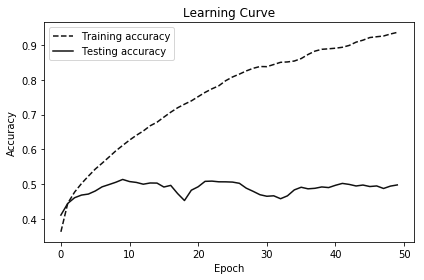

In [98]:
# Draw lines
plt.plot(train_accs,  '--', color="#111111",  label="Training accuracy")
plt.plot(test_accs,  color="#111111", label="Testing accuracy")


# Create plot
plt.title("Learning Curve")
plt.xlabel("Epoch"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

With the epoch increases, the training accuary continue increasing. The testing accuracy increases at start and then decreases, which means the model is overfitted.